In [7]:
# CHAT = 'asstot'
# CHAT = 'компы'
# CHAT = 'снек'
CHAT = 'катюша'

# MASK = 'penis.png'
# MASK = 'plug.jpg'
# MASK = 'snek3.png'
MASK = 'heart.png'

SIZE = (2000, 2000)  # Resulting size of the image


INFO:root:Reading messages
INFO:root:Building word cloud
INFO:root:Saving result
INFO:root:Plotting result


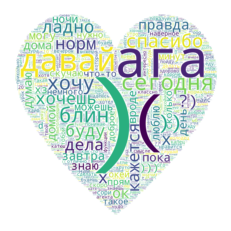

<Figure size 432x288 with 0 Axes>

In [8]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt

from wc import build_word_cloud
from chat import read_messages

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

logger.info('Reading messages')
messages = read_messages(Path('chats') / CHAT / 'result.json')
mask_path = Path('masks') / MASK

logger.info('Building word cloud')
# additional_stopwords = None
additional_stopwords = ['почему', 'вообще', 'просто', 'кстати', 'вродне', 'типа', 'очень', 'тебе']
wc = build_word_cloud(
    messages=messages,
    mask_path=mask_path,
    size=SIZE,
    additional_stopwords=additional_stopwords
)

logger.info('Saving result')
output_path = Path('results')
output_path.mkdir(exist_ok=True)
wc.to_file(output_path / f'{CHAT}.png')

logger.info('Plotting result')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
